In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
# import seaborn as sns
from pathlib import Path
plt.style.use('seaborn-whitegrid')

In [11]:
# kaggle path
path = Path('./input/comptab_2018-01-29_16_00_comma_separated.csv') 
data = pd.read_csv(path)

In [12]:
data.head(5)

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C
1,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,XV,RS,RS,NaN,1.0,bodies,NaN,Q,O
2,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,feathers,NaN,S,W
3,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,specimens,NaN,S,W
4,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,DK,IS,NaN,700.0,NaN,specimens,NaN,S,W


In [21]:
data['Order'].value_counts()

Orchidales           9973
Crocodylia           8199
Scleractinia         8161
Serpentes            5390
Caryophyllales       4838
Psittaciformes       4308
Sauria               3498
Carnivora            2846
Acipenseriformes     2369
Primates             2080
Artiodactyla         1423
Testudines           1339
Falconiformes        1226
Proboscidea          1225
Euphorbiales         1153
Liliales             1003
Nepenthales           627
Myrtales              538
Cetacea               459
Fabales               420
Anura                 414
Gorgonacea            381
Cycadales             373
Perissodactyla        355
Strigiformes          315
Sapindales            312
Lepidoptera           310
Galliformes           274
Veneroida             268
Osteoglossiformes     214
                     ... 
Pilosa                 17
Rhamnales              16
Myliobatiformes        15
Rodentia               15
Sirenia                14
Fagales                13
Lamiales               12
Dicksoniales

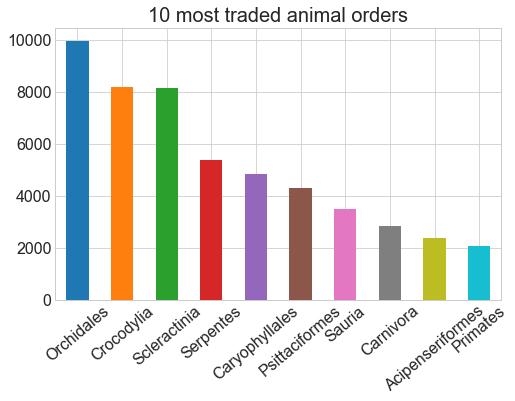

In [32]:
class_distribution = data['Order'].value_counts(normalize=False)
plt.figure(figsize=(8,5))
class_distribution.head(10).plot(kind='bar', fontsize=16)
plt.title('10 most traded animal orders', fontsize=20)
plt.xticks(rotation=40)
plt.figure(figsize=(10,10))

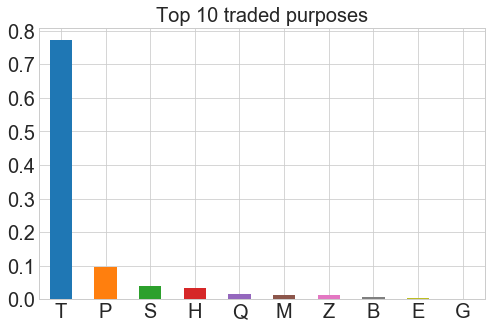

In [36]:
class_distribution = data['Purpose'].value_counts(normalize=True)
plt.figure(figsize=(8,5))
class_distribution.head(10).plot(kind='bar', fontsize=20)
plt.title('Top 10 trading purposes', fontsize=20)
plt.xticks(rotation=0)
plt.figure(figsize=(10,10))

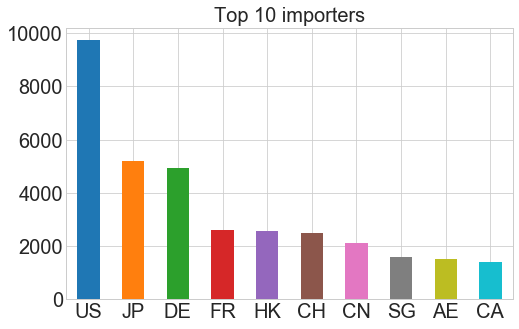

In [37]:
class_distribution = data['Importer'].value_counts(normalize=False)
plt.figure(figsize=(8,5))
class_distribution.head(10).plot(kind='bar', fontsize=20)
plt.title('Top 10 importers', fontsize=20)
plt.xticks(rotation=0)
plt.figure(figsize=(10,10))

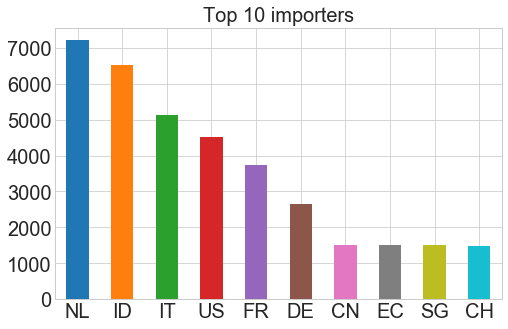

In [38]:
class_distribution = data['Exporter'].value_counts(normalize=False)
plt.figure(figsize=(8,5))
class_distribution.head(10).plot(kind='bar', fontsize=20)
plt.title('Top 10 importers', fontsize=20)
plt.xticks(rotation=0)
plt.figure(figsize=(10,10))

Text(0.5,1,u'Top five traded animal classes that were bred in captivity')

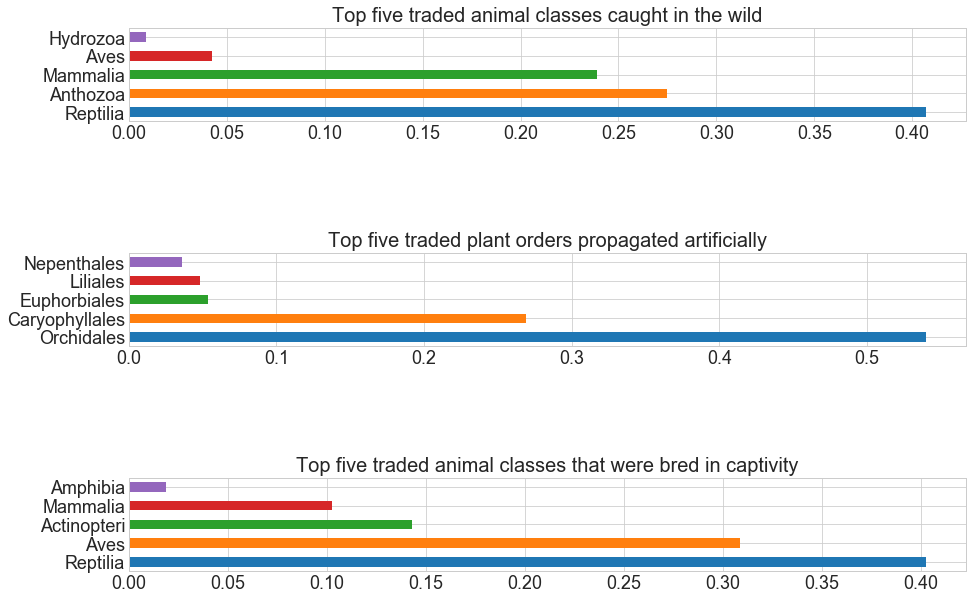

In [39]:
plt.figure(figsize=(15,10))
plt.subplot(511)
data['Class'].loc[data['Source']=='W'].value_counts(normalize=True).head(5).plot.barh(fontsize=18)
plt.title('Top five traded animal classes caught in the wild', fontsize=20)
plt.subplot(513)
data['Order'].loc[data['Source']=='A'].value_counts(normalize=True).head(5).plot.barh(fontsize=18)
plt.title('Top five traded plant orders propagated artificially', fontsize=20)
plt.subplot(515)
data['Class'].loc[data['Source']=='C'].value_counts(normalize=True).head(5).plot.barh(fontsize=18)
plt.title('Top five traded animal classes that were bred in captivity', fontsize=20)

Text(0.5,1,u'Amount of 15 most traded animal goods')

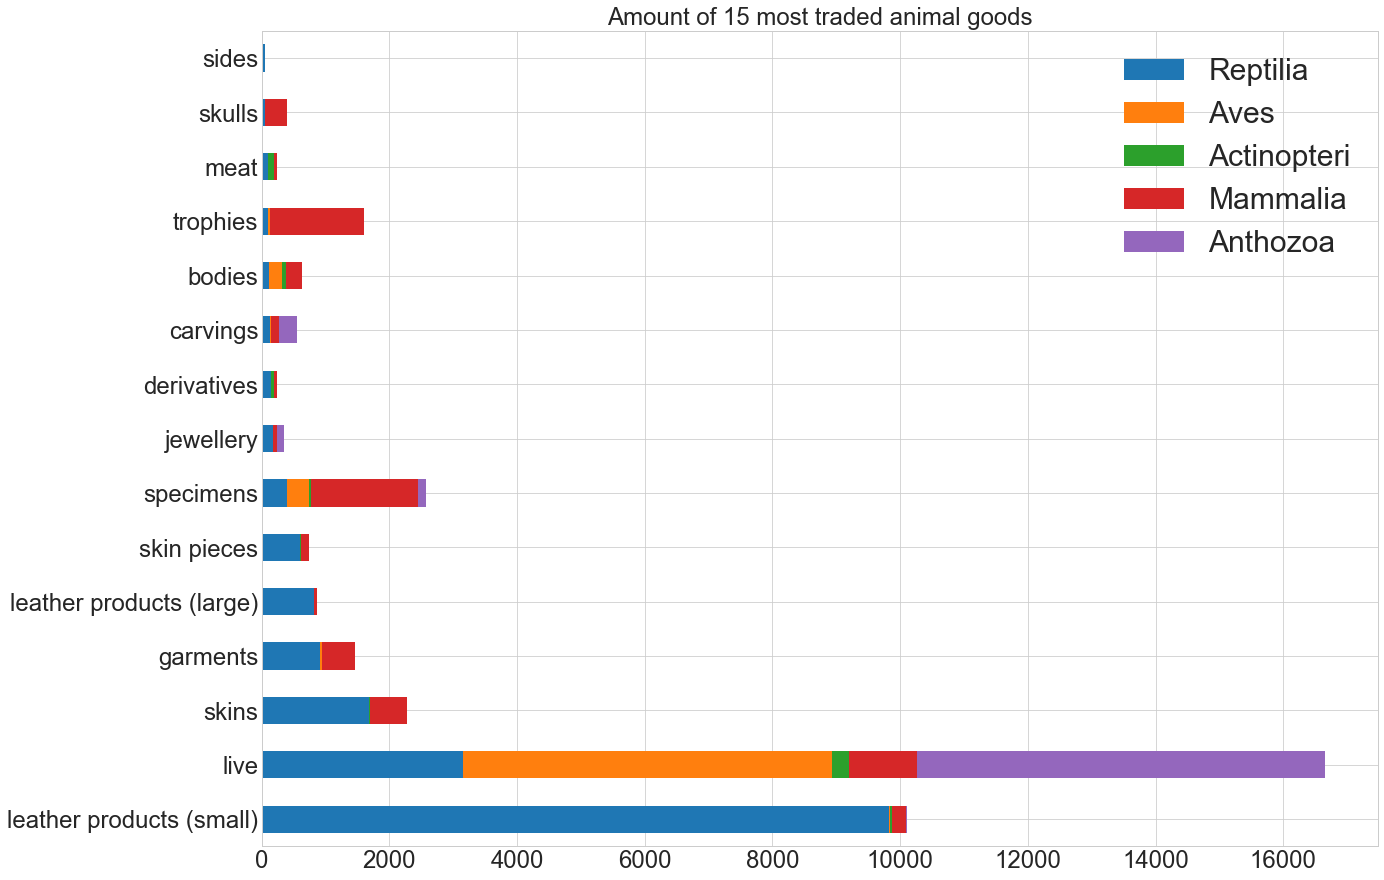

In [40]:
animal_classes = ['Reptilia', 'Aves', 'Actinopteri', 'Mammalia', 'Anthozoa']
stacked_data = pd.DataFrame()
for i in animal_classes:
    stacked_data[i] = data['Term'].loc[data['Class']==i].value_counts()
stacked_data.head(15).plot.barh(figsize=(20,15), fontsize=24, stacked=True)
#plt.xscale('log') #  applying logscale removes Reptilia bar color?!
plt.legend(fontsize=30)
plt.title('Amount of 15 most traded animal goods', fontsize=24)